In [496]:
import mysql.connector as mysql
import pandas as pd

In [497]:
import getpass
schema = 'root'
pwd = getpass.getpass('Enter Password')

In [498]:
db = mysql.connect(host = 'localhost', port = 3306, user = 'root', password='Bappa@1234567', database='Stock2023')
cursor = db.cursor()
query = "select * from mf_fund3"

cursor.execute(query)
dbs = cursor.fetchall()
# for db in dbs:
#     print(db)

In [499]:
mf_db = pd.read_sql(query, con = db)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3875687749.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mf_db = pd.read_sql(query, con = db)


In [500]:
mf_db.head(10)

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
5      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
6      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
7      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
8      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
9      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

  ISIN_Div_Payout_ISIN_Growth ISIN_Div_Reinvestment Net_Asset_Value  \
0                INF209K01XB7                               46.4526   
1                INF209K01XB7                               46.4542   
2                INF209K01XB7                               46.6507   
3                INF209K01XB7                               46.7080   
4                INF209K01XB7                               46.6931   
5                INF209K01XB7                               46.8003   
6                INF209K01XB7                               46.7729   
7                INF209K01XB7                               46.7263   
8                INF209K01XB7                               46.8242   
9                INF209K01XB7                               46.9807   

  Repurchase_Price Sale_Price         Date  
0          45.9881    46.4526  05-Mar-2018  
1          45.9897    46.4542  06-Mar-2018  
2          46.1842    46.6507  07-Mar-2018  
3          46.2409    46.7080  08-Mar-2018  
4          46.2262    46.6931  09-Mar-2018  
5          46.3323    46.8003  12-Mar-2018  
6          46.3052    46.7729  13-Mar-2018  
7          46.2590    46.7263  14-Mar-2018  
8          46.3560    46.8242  15-Mar-2018  
9          46.5109    46.9807  16-Mar-2018

In [501]:
mf = mf_db.loc[:,['Scheme_Code','Scheme_Name','Net_Asset_Value','Date']]

In [502]:
mf.head()

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

  Net_Asset_Value         Date  
0         46.4526  05-Mar-2018  
1         46.4542  06-Mar-2018  
2         46.6507  07-Mar-2018  
3         46.7080  08-Mar-2018  
4         46.6931  09-Mar-2018

In [503]:
mf.shape

(7210502, 4)

In [504]:
mf.isnull().sum()

Scheme_Code           0
Scheme_Name        1818
Net_Asset_Value    1818
Date               1818
dtype: int64

In [505]:
mf.dropna(axis=0 , inplace=True)

In [506]:
mf_1= mf[mf['Scheme_Name'].str.contains('Direct')]

In [507]:
mf_1.head()

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

  Net_Asset_Value         Date  
0         46.4526  05-Mar-2018  
1         46.4542  06-Mar-2018  
2         46.6507  07-Mar-2018  
3         46.7080  08-Mar-2018  
4         46.6931  09-Mar-2018

In [508]:
mf_1.shape

(3038106, 4)

In [509]:
mf_1['Scheme_Name'].value_counts()

Invesco India Liquid Fund - Direct Plan - Growth                                                                                                                     1825
Axis Liquid Fund - Direct Plan - Daily IDCW                                                                                                                          1825
IDFC Cash Fund -Direct Plan-Growth                                                                                                                                   1825
IDFC Cash Fund -Direct Plan-Daily IDCW                                                                                                                               1825
IDFC Cash Fund -Direct Plan -Weekly IDCW                                                                                                                             1825
IDFC Cash Fund -Direct Plan -Monthly IDCW                                                                                                             

In [510]:
mf_2 = mf_1[mf_1['Scheme_Name'].str.contains('Growth')]

In [511]:
mf_2.head()

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

  Net_Asset_Value         Date  
0         46.4526  05-Mar-2018  
1         46.4542  06-Mar-2018  
2         46.6507  07-Mar-2018  
3         46.7080  08-Mar-2018  
4         46.6931  09-Mar-2018

In [512]:
mf_2.shape

(1108810, 4)

In [513]:
mf_2['Scheme_Name'].value_counts()

Union Liquid Fund - Direct Plan - Growth Option                                                                                                             1825
Invesco India Liquid Fund - Direct Plan - Growth                                                                                                            1825
BANK OF INDIA Liquid Fund- Direct Plan- Growth                                                                                                              1825
UTI-  Liquid Cash Plan - Direct Plan - Growth Option                                                                                                        1825
Quantum Liquid Fund - Direct Plan Growth Option                                                                                                             1825
Axis Liquid Fund - Direct Plan - Growth Option                                                                                                              1825
Canara Robeco Liquid Fund -Unclaim

In [514]:
mf_2['Net_Asset_Value'] = pd.to_numeric(mf_2['Net_Asset_Value'], errors='coerce').fillna(0, downcast='infer')

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/4228674314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_2['Net_Asset_Value'] = pd.to_numeric(mf_2['Net_Asset_Value'], errors='coerce').fillna(0, downcast='infer')


In [515]:
pd.set_option('display.max_row', None)
mf_2.Scheme_Name.value_counts()

Union Liquid Fund - Direct Plan - Growth Option                                                                                                             1825
Invesco India Liquid Fund - Direct Plan - Growth                                                                                                            1825
BANK OF INDIA Liquid Fund- Direct Plan- Growth                                                                                                              1825
UTI-  Liquid Cash Plan - Direct Plan - Growth Option                                                                                                        1825
Quantum Liquid Fund - Direct Plan Growth Option                                                                                                             1825
Axis Liquid Fund - Direct Plan - Growth Option                                                                                                              1825
Canara Robeco Liquid Fund -Unclaim

In [516]:
mf_2.dtypes

Scheme_Code         object
Scheme_Name         object
Net_Asset_Value    float64
Date                object
dtype: object

In [517]:
max(mf_2['Date'])
# max(aditya_mf['Date'])

'31-Oct-2022'

In [518]:
mf_2['Date'] = pd.to_datetime(mf_2['Date'])

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/294033793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf_2['Date'] = pd.to_datetime(mf_2['Date'])


In [519]:
# datetime_series = pd.Series(mf_2['Date'])

# mf_2['Date'] = datetime_series.dt.strftime('%Y-%m-%d')

In [520]:
mf_2.dtypes

Scheme_Code                object
Scheme_Name                object
Net_Asset_Value           float64
Date               datetime64[ns]
dtype: object

In [521]:
mf_2.head(10)

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
5      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
6      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
7      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
8      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
9      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

   Net_Asset_Value       Date  
0          46.4526 2018-03-05  
1          46.4542 2018-03-06  
2          46.6507 2018-03-07  
3          46.7080 2018-03-08  
4          46.6931 2018-03-09  
5          46.8003 2018-03-12  
6          46.7729 2018-03-13  
7          46.7263 2018-03-14  
8          46.8242 2018-03-15  
9          46.9807 2018-03-16

In [522]:
from datetime import datetime, timedelta,date

In [523]:
start_date = pd.Timestamp(max(mf_2['Date']))
end_date = start_date + pd.Timedelta(days=-360)

In [524]:
start_date

Timestamp('2023-03-02 00:00:00')

In [525]:
end_date

Timestamp('2022-03-07 00:00:00')

In [526]:
mf_3m = mf_2.loc[(mf_2['Date'] == start_date) | (mf_2['Date'] == end_date), :]

In [527]:
mf_3m.head()

Scheme_Code                                        Scheme_Name  \
2000      148921  Aditya Birla Sun Life Multi-Cap Fund-Direct Gr...   
2246      148921  Aditya Birla Sun Life Multi-Cap Fund-Direct Gr...   
4592      119528  Aditya Birla Sun Life Frontline Equity Fund - ...   
4838      119528  Aditya Birla Sun Life Frontline Equity Fund - ...   
9530      119436  Aditya Birla Sun Life Equity Advantage Fund - ...   

      Net_Asset_Value       Date  
2000            11.28 2022-03-07  
2246            12.39 2023-03-02  
4592           333.43 2022-03-07  
4838           367.67 2023-03-02  
9530           642.75 2022-03-07

In [528]:
max(mf_3m['Date'])

Timestamp('2023-03-02 00:00:00')

In [529]:
mf_3m.nunique()

Scheme_Code        1160
Scheme_Name        1152
Net_Asset_Value    1988
Date                  2
dtype: int64

In [530]:
mf_3m.shape

(2072, 4)

In [531]:
end_date1 = start_date + pd.Timedelta(days=-90)
mf_6m = mf_2.loc[(mf_2['Date'] == start_date) | (mf_2['Date'] == end_date1), :]

In [532]:
end_date1

Timestamp('2022-12-02 00:00:00')

In [533]:
mf_6m.head()

Scheme_Code                                        Scheme_Name  \
2183      148921  Aditya Birla Sun Life Multi-Cap Fund-Direct Gr...   
2246      148921  Aditya Birla Sun Life Multi-Cap Fund-Direct Gr...   
4775      119528  Aditya Birla Sun Life Frontline Equity Fund - ...   
4838      119528  Aditya Birla Sun Life Frontline Equity Fund - ...   
9713      119436  Aditya Birla Sun Life Equity Advantage Fund - ...   

      Net_Asset_Value       Date  
2183            13.11 2022-12-02  
2246            12.39 2023-03-02  
4775           395.09 2022-12-02  
4838           367.67 2023-03-02  
9713           685.24 2022-12-02

In [534]:
max(mf_6m['Date'])

Timestamp('2023-03-02 00:00:00')

In [535]:
min(mf_6m['Date'])

Timestamp('2022-12-02 00:00:00')

In [536]:
mf_6m.shape

(2122, 4)

In [537]:
end_date2 = start_date + pd.Timedelta(days=-90)
mf_12m = mf_2.loc[(mf_2['Date'] == start_date) | (mf_2['Date'] == end_date2), :]

In [538]:
end_date2

Timestamp('2022-12-02 00:00:00')

In [539]:
mf_12m.shape

(2122, 4)

In [540]:
mf_12m.nunique()

Scheme_Code        1086
Scheme_Name        1086
Net_Asset_Value    2043
Date                  2
dtype: int64

In [541]:
end_date3 = start_date + pd.Timedelta(days=-1080)
mf_3Y = mf_2.loc[(mf_2['Date'] == start_date) | (mf_2['Date'] < end_date), :]

In [542]:
mf_3Y.shape

(852610, 4)

In [543]:
mf_3Y.nunique()

Scheme_Code          1305
Scheme_Name          1297
Net_Asset_Value    500551
Date                 1465
dtype: int64

In [544]:
end_date4 = start_date + pd.Timedelta(days=-1825)
mf_5Y = mf_2.loc[(mf_2['Date'] == start_date) | (mf_2['Date'] < end_date), :]

In [545]:
end_date4

Timestamp('2018-03-03 00:00:00')

In [546]:
mf_5Y.shape

(852610, 4)

In [547]:
max(mf_5Y['Date']), min(mf_5Y['Date'])

(Timestamp('2023-03-02 00:00:00'), Timestamp('2018-03-04 00:00:00'))

In [548]:
mf_2.nunique()

Scheme_Code          1305
Scheme_Name          1297
Net_Asset_Value    607636
Date                 1825
dtype: int64

In [549]:
mf_5Y.nunique()

Scheme_Code          1305
Scheme_Name          1297
Net_Asset_Value    500551
Date                 1465
dtype: int64

In [212]:
# pip install -U pandasql

/Users/subirsaha/.zshenv:2: closing brace expected
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=1ecaa6ec9a3d25cbd4e2063235f647056c013570725f594ed5bd368c70e81d0c
  Stored in directory: /Users/subirsaha/Library/Caches/pip/wheels/4c/a4/ce/ad31f7d9f6bfce32741955de12e76e3a6e7181c20321db3c66
Successfully built pandasql

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [213]:
from pandasql import sqldf

In [215]:
pysqldf = lambda q:sqldf(q,globals())

In [225]:
query = 'select count(*) from aditya_mf'

pysqldf(query)

ObjectNotExecutableError: Not an executable object: 'select count(*) from aditya_mf'

In [550]:
mf_2['Scheme_Name'].value_counts()

Union Liquid Fund - Direct Plan - Growth Option                                                                                                             1825
Invesco India Liquid Fund - Direct Plan - Growth                                                                                                            1825
BANK OF INDIA Liquid Fund- Direct Plan- Growth                                                                                                              1825
UTI-  Liquid Cash Plan - Direct Plan - Growth Option                                                                                                        1825
Quantum Liquid Fund - Direct Plan Growth Option                                                                                                             1825
Axis Liquid Fund - Direct Plan - Growth Option                                                                                                              1825
Canara Robeco Liquid Fund -Unclaim

In [551]:
Union_Liquid = mf_2[mf_2['Scheme_Name'].str.contains('Union Liquid Fund')]

In [552]:
Union_Liquid.head()

Scheme_Code                                      Scheme_Name  \
6701254      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701255      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701256      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701257      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701258      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  
6701254        1724.4805 2018-03-04  
6701255        1724.7936 2018-03-05  
6701256        1725.1481 2018-03-06  
6701257        1725.5550 2018-03-07  
6701258        1725.8655 2018-03-08

In [553]:
Union_Liquid.shape

(1825, 4)

In [701]:
max(Union_Liquid['Date']),min(Union_Liquid['Date'])

(Timestamp('2023-03-02 00:00:00'), Timestamp('2018-03-04 00:00:00'))

In [702]:
start_date = pd.Timestamp(max(Union_Liquid['Date']))
end_date = start_date - pd.Timedelta(days=1825)
unionLF_5Y = Union_Liquid.loc[(Union_Liquid['Date'] == start_date) | (Union_Liquid['Date'] < end_date), :]

In [703]:
max(unionLF_5Y['Date']), min(unionLF_5Y['Date']) 

(Timestamp('2023-03-02 00:00:00'), Timestamp('2023-03-02 00:00:00'))

In [696]:
unionLF_5Y.nunique()

Scheme_Code        1
Scheme_Name        1
Net_Asset_Value    1
Date               1
dtype: int64

In [697]:
unionLF_5Y.sort_values(['Date'],ascending=[0],inplace=True)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/31678878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y.sort_values(['Date'],ascending=[0],inplace=True)


In [698]:
unionLF_5Y.head()

Scheme_Code                                      Scheme_Name  \
6703078      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  
6703078        2156.1427 2023-03-02

In [621]:
unionLF_5YY['1_Q_OLD_Price'] = unionLF_5YY['Net_Asset_Value'].shift(-90)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/2973367720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5YY['1_Q_OLD_Price'] = unionLF_5YY['Net_Asset_Value'].shift(-90)


In [ ]:
unionLF_5YY['1_Q_OLD_Price'] = unionLF_5YY['Net_Asset_Value'].shift(-120)

In [622]:
unionLF_5YY.head()

Scheme_Code                                      Scheme_Name  \
6703078      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702712      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702711      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702710      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702709      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  1_Q_OLD_Price  
6703078        2156.1427 2023-03-02      2027.0197  
6702712        2044.5676 2022-03-01      2026.8358  
6702711        2044.3661 2022-02-28      2026.6446  
6702710        2044.1651 2022-02-27      2026.4595  
6702709        2043.9642 2022-02-26      2026.2769

In [623]:
unionLF_5YY['per_chng']=(unionLF_5YY['Net_Asset_Value']/unionLF_5YY['1_Q_OLD_Price']-1)*100

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/992846754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5YY['per_chng']=(unionLF_5YY['Net_Asset_Value']/unionLF_5YY['1_Q_OLD_Price']-1)*100


In [624]:
unionLF_5YY.head()

Scheme_Code                                      Scheme_Name  \
6703078      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702712      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702711      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702710      119303  Union Liquid Fund - Direct Plan - Growth Option   
6702709      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  1_Q_OLD_Price  per_chng  
6703078        2156.1427 2023-03-02      2027.0197  6.370091  
6702712        2044.5676 2022-03-01      2026.8358  0.874851  
6702711        2044.3661 2022-02-28      2026.6446  0.874426  
6702710        2044.1651 2022-02-27      2026.4595  0.873721  
6702709        2043.9642 2022-02-26      2026.2769  0.872896

In [626]:
union_dd_mf=unionLF_5YY.iloc[0]

In [629]:
union_dd_mf.head()

Scheme_Code                                                 119303
Scheme_Name        Union Liquid Fund - Direct Plan - Growth Option
Net_Asset_Value                                          2156.1427
Date                                           2023-03-02 00:00:00
1_Q_OLD_Price                                            2027.0197
Name: 6703078, dtype: object

In [681]:
analysis = {}
analysis[union_dd_mf.Scheme_Code]={}
analysis[union_dd_mf.Scheme_Code]['Scheme_Name']=union_dd_mf.Scheme_Name
analysis[union_dd_mf.Scheme_Code]['NAV']=union_dd_mf.Net_Asset_Value
analysis[union_dd_mf.Scheme_Code]['3M_Ret']=union_dd_mf['1_Q_OLD_Price']

In [682]:
analysis

{'119303': {'Scheme_Name': 'Union Liquid Fund - Direct Plan - Growth Option',
  'NAV': 2156.1427,
  '3M_Ret': 2027.0197}}

In [683]:
analysis_df=pd.DataFrame.from_dict(analysis,orient='index') 

In [690]:
analysis_df.reset_index(inplace=True)

In [691]:
analysis_df.head()

Scheme_Code                                      Scheme_Name        NAV  \
0      119303  Union Liquid Fund - Direct Plan - Growth Option  2156.1427   

      3M_Ret  
0  2027.0197

In [678]:
analysis_df.columns

Index(['Scheme_Name', 'NAV', '3M_Ret'], dtype='object')

In [685]:
analysis_df.index.names=['Scheme_Code']

In [559]:
unionLF_5Y['daily_return'] = unionLF_5Y['Net_Asset_Value']/unionLF_5Y['prev_price']-1


/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1426265418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y['daily_return'] = unionLF_5Y['Net_Asset_Value']/unionLF_5Y['prev_price']-1


In [560]:
unionLF_5Y.head()

Scheme_Code                                      Scheme_Name  \
6701254      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701255      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701256      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701257      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701258      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  prev_price  daily_return  
6701254        1724.4805 2018-03-04         NaN           NaN  
6701255        1724.7936 2018-03-05   1724.4805      0.000182  
6701256        1725.1481 2018-03-06   1724.7936      0.000206  
6701257        1725.5550 2018-03-07   1725.1481      0.000236  
6701258        1725.8655 2018-03-08   1725.5550      0.000180

In [561]:
unionLF_5Y['expand_mean']=unionLF_5Y['daily_return'].expanding().mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3532306831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y['expand_mean']=unionLF_5Y['daily_return'].expanding().mean()


In [562]:
unionLF_5Y['roll_mean']=unionLF_5Y['daily_return'].rolling(2).mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3163618163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y['roll_mean']=unionLF_5Y['daily_return'].rolling(2).mean()


In [563]:
unionLF_5Y.head()

Scheme_Code                                      Scheme_Name  \
6701254      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701255      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701256      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701257      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701258      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  prev_price  daily_return  expand_mean  \
6701254        1724.4805 2018-03-04         NaN           NaN          NaN   
6701255        1724.7936 2018-03-05   1724.4805      0.000182     0.000182   
6701256        1725.1481 2018-03-06   1724.7936      0.000206     0.000194   
6701257        1725.5550 2018-03-07   1725.1481      0.000236     0.000208   
6701258        1725.8655 2018-03-08   1725.5550      0.000180     0.000201   

         roll_mean  
6701254        NaN  
6701255        NaN  
6701256   0.000194  
6701257   0.000221  
6701258   0.000208

In [564]:
unionLF_5Y['sd']=unionLF_5Y['daily_return'].expanding().std()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3630893025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y['sd']=unionLF_5Y['daily_return'].expanding().std()


In [565]:
unionLF_5Y.head()

Scheme_Code                                      Scheme_Name  \
6701254      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701255      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701256      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701257      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701258      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  prev_price  daily_return  expand_mean  \
6701254        1724.4805 2018-03-04         NaN           NaN          NaN   
6701255        1724.7936 2018-03-05   1724.4805      0.000182     0.000182   
6701256        1725.1481 2018-03-06   1724.7936      0.000206     0.000194   
6701257        1725.5550 2018-03-07   1725.1481      0.000236     0.000208   
6701258        1725.8655 2018-03-08   1725.5550      0.000180     0.000201   

         roll_mean        sd  
6701254        NaN       NaN  
6701255        NaN       NaN  
6701256   0.000194  0.000017  
6701257   0.000221  0.000027  
6701258   0.000208  0.000026

In [566]:
unionLF_5Y['expand_percen']=(unionLF_5Y['daily_return'] / 
                  unionLF_5Y['daily_return'].sum()) * 100

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3049361448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unionLF_5Y['expand_percen']=(unionLF_5Y['daily_return'] /


In [567]:
unionLF_5Y.head()

Scheme_Code                                      Scheme_Name  \
6701254      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701255      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701256      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701257      119303  Union Liquid Fund - Direct Plan - Growth Option   
6701258      119303  Union Liquid Fund - Direct Plan - Growth Option   

         Net_Asset_Value       Date  prev_price  daily_return  expand_mean  \
6701254        1724.4805 2018-03-04         NaN           NaN          NaN   
6701255        1724.7936 2018-03-05   1724.4805      0.000182     0.000182   
6701256        1725.1481 2018-03-06   1724.7936      0.000206     0.000194   
6701257        1725.5550 2018-03-07   1725.1481      0.000236     0.000208   
6701258        1725.8655 2018-03-08   1725.5550      0.000180     0.000201   

         roll_mean        sd  expand_percen  
6701254        NaN       NaN            NaN  
6701255        NaN       NaN       0.080612  
6701256   0.000194  0.000017       0.091254  
6701257   0.000221  0.000027       0.104721  
6701258   0.000208  0.000026       0.079892

In [568]:
import seaborn as sns
import matplotlib.animation as animation
sns.set_style("whitegrid")
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from matplotlib import pyplot as plt 
%matplotlib inline

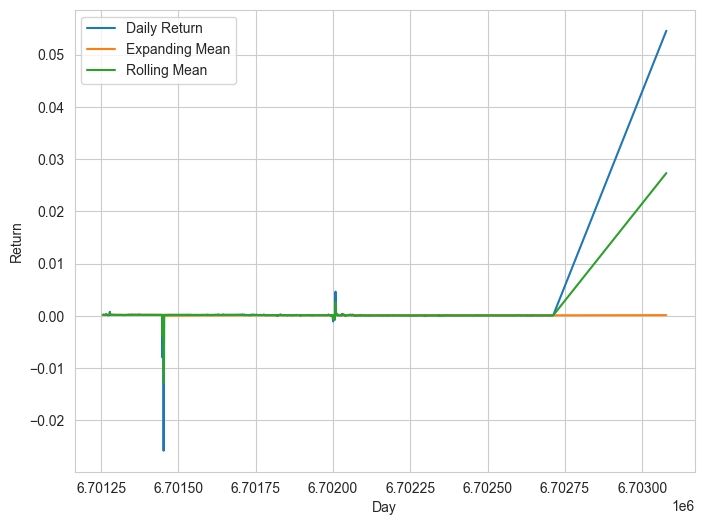

In [569]:
plt.subplots(figsize=(8,6))
plt.plot(unionLF_5Y['daily_return'], label='Daily Return')
plt.plot(unionLF_5Y['expand_mean'], label='Expanding Mean')
plt.plot(unionLF_5Y['roll_mean'], label = 'Rolling Mean')
# plt.plot(unionLF_5Y['sd'], level='SD')
plt.xlabel('Day')
plt.ylabel('Return')
plt.legend()
plt.show()

In [570]:
aditya_N50_mf = mf_2[mf_2['Scheme_Name'].str.contains('Aditya Birla Sun Life Nifty 50 Index Fund')]

In [571]:
aditya_N50_mf.head()

Scheme_Code                                        Scheme_Name  \
323017      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323018      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323019      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323020      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323021      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   

        Net_Asset_Value       Date  
323017         101.5784 2018-03-05  
323018         100.5026 2018-03-06  
323019          99.6080 2018-03-07  
323020         100.4371 2018-03-08  
323021         100.2574 2018-03-09

In [572]:
aditya_N50_mf.shape

(1234, 4)

In [573]:
aditya_N50_mf.nunique()

Scheme_Code           1
Scheme_Name           1
Net_Asset_Value    1234
Date               1234
dtype: int64

In [574]:
start_date = pd.Timestamp(max(aditya_N50_mf['Date']))
end_date = start_date + pd.Timedelta(days=-365)
aditya_N50_1Y = aditya_N50_mf.loc[(aditya_N50_mf['Date'] == start_date) | (aditya_N50_mf['Date'] < end_date), :]

In [575]:
aditya_N50_1Y.nunique()

Scheme_Code          1
Scheme_Name          1
Net_Asset_Value    985
Date               985
dtype: int64

In [576]:
aditya_N50_1Y['prev_price'] = aditya_N50_1Y['Net_Asset_Value'].shift(1)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/50524831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['prev_price'] = aditya_N50_1Y['Net_Asset_Value'].shift(1)


In [577]:
aditya_N50_1Y['daily_returns']= aditya_N50_1Y['Net_Asset_Value']/aditya_N50_1Y['prev_price']-1

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1528208676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['daily_returns']= aditya_N50_1Y['Net_Asset_Value']/aditya_N50_1Y['prev_price']-1


In [578]:
aditya_N50_1Y.head()

Scheme_Code                                        Scheme_Name  \
323017      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323018      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323019      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323020      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323021      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   

        Net_Asset_Value       Date  prev_price  daily_returns  
323017         101.5784 2018-03-05         NaN            NaN  
323018         100.5026 2018-03-06    101.5784      -0.010591  
323019          99.6080 2018-03-07    100.5026      -0.008901  
323020         100.4371 2018-03-08     99.6080       0.008324  
323021         100.2574 2018-03-09    100.4371      -0.001789

In [579]:
aditya_N50_1Y['expending_mean']= aditya_N50_1Y['daily_returns'].expanding().mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/334996142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['expending_mean']= aditya_N50_1Y['daily_returns'].expanding().mean()


In [580]:
aditya_N50_1Y['rolling_mean'] = aditya_N50_1Y['daily_returns'].rolling(2).mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3190486503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['rolling_mean'] = aditya_N50_1Y['daily_returns'].rolling(2).mean()


In [581]:
aditya_N50_1Y['SD'] = aditya_N50_1Y['daily_returns'].expanding().std()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/4189839807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['SD'] = aditya_N50_1Y['daily_returns'].expanding().std()


In [582]:
aditya_N50_1Y['percentage'] = (aditya_N50_1Y['daily_returns']/aditya_N50_1Y['daily_returns'].sum())*100

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/858532781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aditya_N50_1Y['percentage'] = (aditya_N50_1Y['daily_returns']/aditya_N50_1Y['daily_returns'].sum())*100


In [583]:
aditya_N50_1Y.head()

Scheme_Code                                        Scheme_Name  \
323017      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323018      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323019      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323020      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   
323021      119648  Aditya Birla Sun Life Nifty 50 Index Fund - Gr...   

        Net_Asset_Value       Date  prev_price  daily_returns  expending_mean  \
323017         101.5784 2018-03-05         NaN            NaN             NaN   
323018         100.5026 2018-03-06    101.5784      -0.010591       -0.010591   
323019          99.6080 2018-03-07    100.5026      -0.008901       -0.009746   
323020         100.4371 2018-03-08     99.6080       0.008324       -0.003723   
323021         100.2574 2018-03-09    100.4371      -0.001789       -0.003239   

        rolling_mean        SD  percentage  
323017           NaN       NaN         NaN  
323018           NaN       NaN   -1.699464  
323019     -0.009746  0.001195   -1.428346  
323020     -0.000289  0.010467    1.335656  
323021      0.003267  0.008601   -0.287102

In [584]:
icici_PLF_mf = mf_2[mf_2['Scheme_Name'].str.contains('ICICI Prudential Liquid Fund')]

In [585]:
icici_PLF_mf.head()

Scheme_Code                                        Scheme_Name  \
2532807      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532808      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532809      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532810      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532811      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   

         Net_Asset_Value       Date  
2532807         255.5112 2018-03-04  
2532808         255.5602 2018-03-05  
2532809         255.6127 2018-03-06  
2532810         255.6729 2018-03-07  
2532811         255.7219 2018-03-08

In [586]:
start_date = pd.Timestamp(max(icici_PLF_mf['Date']))
end_date = start_date + pd.Timedelta(days=-365)
icici_PLF_1Y = icici_PLF_mf.loc[(icici_PLF_mf['Date'] == start_date) | (icici_PLF_mf['Date'] < end_date), :]

In [587]:
icici_PLF_mf.shape, icici_PLF_1Y.shape

((1825, 4), (1460, 4))

In [588]:
icici_PLF_1Y.nunique()

Scheme_Code           1
Scheme_Name           1
Net_Asset_Value    1460
Date               1460
dtype: int64

In [589]:
icici_PLF_1Y['prev_price'] = icici_PLF_1Y['Net_Asset_Value'].shift(1)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3280270286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['prev_price'] = icici_PLF_1Y['Net_Asset_Value'].shift(1)


In [590]:
icici_PLF_1Y.head()

Scheme_Code                                        Scheme_Name  \
2532807      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532808      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532809      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532810      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532811      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   

         Net_Asset_Value       Date  prev_price  
2532807         255.5112 2018-03-04         NaN  
2532808         255.5602 2018-03-05    255.5112  
2532809         255.6127 2018-03-06    255.5602  
2532810         255.6729 2018-03-07    255.6127  
2532811         255.7219 2018-03-08    255.6729

In [591]:
icici_PLF_1Y['daily_returns']= icici_PLF_1Y['Net_Asset_Value']/icici_PLF_1Y['prev_price']-1

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/2740073145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['daily_returns']= icici_PLF_1Y['Net_Asset_Value']/icici_PLF_1Y['prev_price']-1


In [592]:
icici_PLF_1Y['expending_mean']= icici_PLF_1Y['daily_returns'].expanding().mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3546942139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['expending_mean']= icici_PLF_1Y['daily_returns'].expanding().mean()


In [593]:
icici_PLF_1Y['rolling_mean'] = icici_PLF_1Y['daily_returns'].rolling(2).mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3375230016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['rolling_mean'] = icici_PLF_1Y['daily_returns'].rolling(2).mean()


In [594]:
icici_PLF_1Y['expending_std'] = icici_PLF_1Y['daily_returns'].expanding().std()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1505670892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['expending_std'] = icici_PLF_1Y['daily_returns'].expanding().std()


In [595]:
icici_PLF_1Y['percentage'] = (icici_PLF_1Y['daily_returns']/icici_PLF_1Y['daily_returns'].sum())*100

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3061025370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici_PLF_1Y['percentage'] = (icici_PLF_1Y['daily_returns']/icici_PLF_1Y['daily_returns'].sum())*100


In [596]:
icici_PLF_1Y.head()

Scheme_Code                                        Scheme_Name  \
2532807      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532808      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532809      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532810      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   
2532811      120197  ICICI Prudential Liquid Fund - Direct Plan - G...   

         Net_Asset_Value       Date  prev_price  daily_returns  \
2532807         255.5112 2018-03-04         NaN            NaN   
2532808         255.5602 2018-03-05    255.5112       0.000192   
2532809         255.6127 2018-03-06    255.5602       0.000205   
2532810         255.6729 2018-03-07    255.6127       0.000236   
2532811         255.7219 2018-03-08    255.6729       0.000192   

         expending_mean  rolling_mean  expending_std  percentage  
2532807             NaN           NaN            NaN         NaN  
2532808        0.000192           NaN            NaN    0.073590  
2532809        0.000199      0.000199       0.000010    0.078831  
2532810        0.000211      0.000220       0.000022    0.090375  
2532811        0.000206      0.000214       0.000021    0.073544

In [597]:
tata_LF_mf = mf_2[mf_2['Scheme_Name'].str.contains('Tata Liquid Fund')]

In [598]:
tata_LF_mf.head()

Scheme_Code                                  Scheme_Name  \
6438751      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438752      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438753      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438754      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438755      119861  Tata Liquid Fund- Direct Plan-Growth Option   

         Net_Asset_Value       Date  
6438751        2721.9536 2018-03-04  
6438752        2722.4698 2018-03-05  
6438753        2723.0320 2018-03-06  
6438754        2723.6720 2018-03-07  
6438755        2724.2166 2018-03-08

In [599]:
min(tata_LF_mf['Date']), max(tata_LF_mf['Date'])

(Timestamp('2018-03-04 00:00:00'), Timestamp('2023-03-02 00:00:00'))

In [600]:
start_date = pd.Timestamp(max(tata_LF_mf['Date']))
end_date = start_date + pd.Timedelta(days=-365)
tata_LF_mf_1Y = tata_LF_mf.loc[(tata_LF_mf['Date'] == start_date) | (tata_LF_mf['Date'] < end_date), :]

In [601]:
tata_LF_mf_1Y.head()

Scheme_Code                                  Scheme_Name  \
6438751      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438752      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438753      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438754      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438755      119861  Tata Liquid Fund- Direct Plan-Growth Option   

         Net_Asset_Value       Date  
6438751        2721.9536 2018-03-04  
6438752        2722.4698 2018-03-05  
6438753        2723.0320 2018-03-06  
6438754        2723.6720 2018-03-07  
6438755        2724.2166 2018-03-08

In [602]:
tata_LF_mf_1Y['prev_price'] = tata_LF_mf_1Y['Net_Asset_Value'].shift(1)

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1626418351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['prev_price'] = tata_LF_mf_1Y['Net_Asset_Value'].shift(1)


In [603]:
tata_LF_mf_1Y['daily_returns']= tata_LF_mf_1Y['Net_Asset_Value']/tata_LF_mf_1Y['prev_price']-1

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1111783722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['daily_returns']= tata_LF_mf_1Y['Net_Asset_Value']/tata_LF_mf_1Y['prev_price']-1


In [604]:
tata_LF_mf_1Y['expending_mean']= tata_LF_mf_1Y['daily_returns'].expanding().mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/3327238546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['expending_mean']= tata_LF_mf_1Y['daily_returns'].expanding().mean()


In [605]:
tata_LF_mf_1Y['rolling_mean'] = tata_LF_mf_1Y['daily_returns'].rolling(2).mean()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/1740424204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['rolling_mean'] = tata_LF_mf_1Y['daily_returns'].rolling(2).mean()


In [606]:
tata_LF_mf_1Y['expending_std'] = tata_LF_mf_1Y['daily_returns'].expanding().std()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/2056428767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['expending_std'] = tata_LF_mf_1Y['daily_returns'].expanding().std()


In [607]:
tata_LF_mf_1Y['percentage'] = (tata_LF_mf_1Y['daily_returns']/tata_LF_mf_1Y['daily_returns'].sum())*100

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_1445/107432248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tata_LF_mf_1Y['percentage'] = (tata_LF_mf_1Y['daily_returns']/tata_LF_mf_1Y['daily_returns'].sum())*100


In [610]:
tata_LF_mf_1Y.head()

Scheme_Code                                  Scheme_Name  \
6438751      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438752      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438753      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438754      119861  Tata Liquid Fund- Direct Plan-Growth Option   
6438755      119861  Tata Liquid Fund- Direct Plan-Growth Option   

         Net_Asset_Value       Date  prev_price  daily_returns  \
6438751        2721.9536 2018-03-04         NaN            NaN   
6438752        2722.4698 2018-03-05   2721.9536       0.000190   
6438753        2723.0320 2018-03-06   2722.4698       0.000207   
6438754        2723.6720 2018-03-07   2723.0320       0.000235   
6438755        2724.2166 2018-03-08   2723.6720       0.000200   

         expending_mean  rolling_mean  expending_std  percentage  
6438751             NaN           NaN            NaN         NaN  
6438752        0.000190           NaN            NaN    0.072558  
6438753        0.000198      0.000198       0.000012    0.079009  
6438754        0.000210      0.000221       0.000023    0.089924  
6438755        0.000208      0.000217       0.000019    0.076502

In [609]:
scheme_code = aditya_mf['Scheme_Code'].to_list()
scheme_name = aditya_mf['Scheme_Name'].to_list()
net_asset_value = aditya_mf['Net_Asset_Value'].to_list()
date = aditya_mf['Date'].to_list()

for i in scheme_code:
    ver_name = f"{scheme_code}_df"
    df = pd.DataFrame({
        'Scheme_code':[scheme_code],
        'Scheme_Name' : [scheme_name],
        'Net_Asset_Value': [net_asset_value],
        'Date' : [date]
        })
    globals()[ver_name] = df
    print(df)

                                         Scheme_code  \
0  [120704, 120704, 120704, 120704, 120704, 12070...   

                                         Scheme_Name  \
0  [Aditya Birla Sun Life MIP - Direct Plan - Gro...   

                                     Net_Asset_Value  \
0  [46.4526, 46.4542, 46.6507, 46.708, 46.6931, 4...   

                                                Date  
0  [05-Mar-2018, 06-Mar-2018, 07-Mar-2018, 08-Mar...  
                                         Scheme_code  \
0  [120704, 120704, 120704, 120704, 120704, 12070...   

                                         Scheme_Name  \
0  [Aditya Birla Sun Life MIP - Direct Plan - Gro...   

                                     Net_Asset_Value  \
0  [46.4526, 46.4542, 46.6507, 46.708, 46.6931, 4...   

                                                Date  
0  [05-Mar-2018, 06-Mar-2018, 07-Mar-2018, 08-Mar...  
                                         Scheme_code  \
0  [120704, 120704, 120704, 120704, 120704, 12

KeyboardInterrupt: 

In [238]:
df.head()

Scheme_code  \
0  [120704, 120704, 120704, 120704, 120704, 12070...   

                                         Scheme_Name  \
0  [Aditya Birla Sun Life MIP - Direct Plan - Gro...   

                                     Net_Asset_Value  \
0  [46.4526, 46.4542, 46.6507, 46.708, 46.6931, 4...   

                                                Date  
0  [05-Mar-2018, 06-Mar-2018, 07-Mar-2018, 08-Mar...

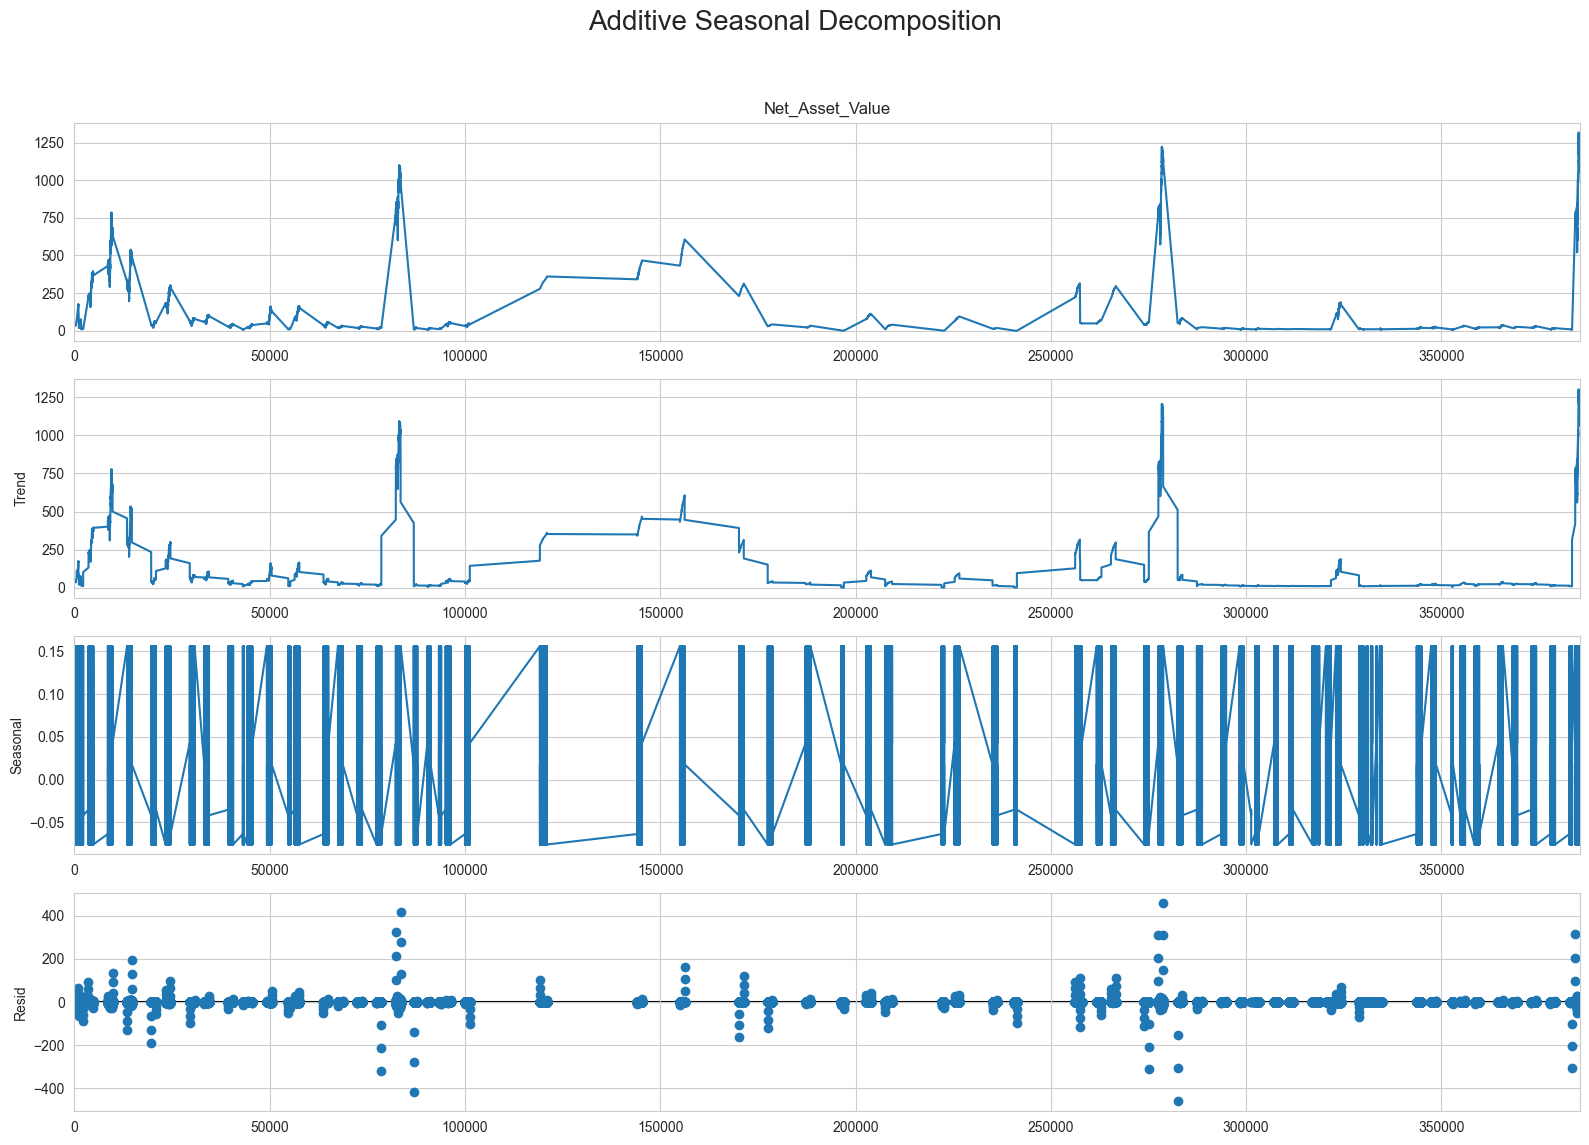

In [143]:
additive_seasonal_decompose = seasonal_decompose(aditya_mf['Net_Asset_Value'], model='additive', period=7)

plt.rcParams.update({'figure.figsize': (16,12)})
additive_seasonal_decompose.plot().suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [150]:
Axis_mf = mf_2[mf_2['Scheme_Name'].str.contains('Axis')]
Union_mf = mf_2[mf_2['Scheme_Name'].str.contains('Union')]
ICICI_mf = mf_2[mf_2['Scheme_Name'].str.contains('ICICI')]
Parag_mf = mf_2[mf_2['Scheme_Name'].str.contains('Parag')]
Tata_mf = mf_2[mf_2['Scheme_Name'].str.contains('Tata')]
SBI_mf = mf_2[mf_2['Scheme_Name'].str.contains('SBI')]
hdfc_mf = mf_2[mf_2['Scheme_Name'].str.contains('HDFC')]
idfc_mf = mf_2[mf_2['Scheme_Name'].str.contains('IDFC')]
Kotak_mf = mf_2[mf_2['Scheme_Name'].str.contains('Kotak')]

In [155]:
Axis_mf.shape

(46091, 3)

In [156]:
Axis_mf.head()

Scheme_Name  Net_Asset_Value         Date
389198  Axis Multicap Fund - Direct Growth            10.01  23-Dec-2021
389199  Axis Multicap Fund - Direct Growth            10.01  24-Dec-2021
389200  Axis Multicap Fund - Direct Growth            10.01  27-Dec-2021
389201  Axis Multicap Fund - Direct Growth            10.05  28-Dec-2021
389202  Axis Multicap Fund - Direct Growth            10.05  29-Dec-2021

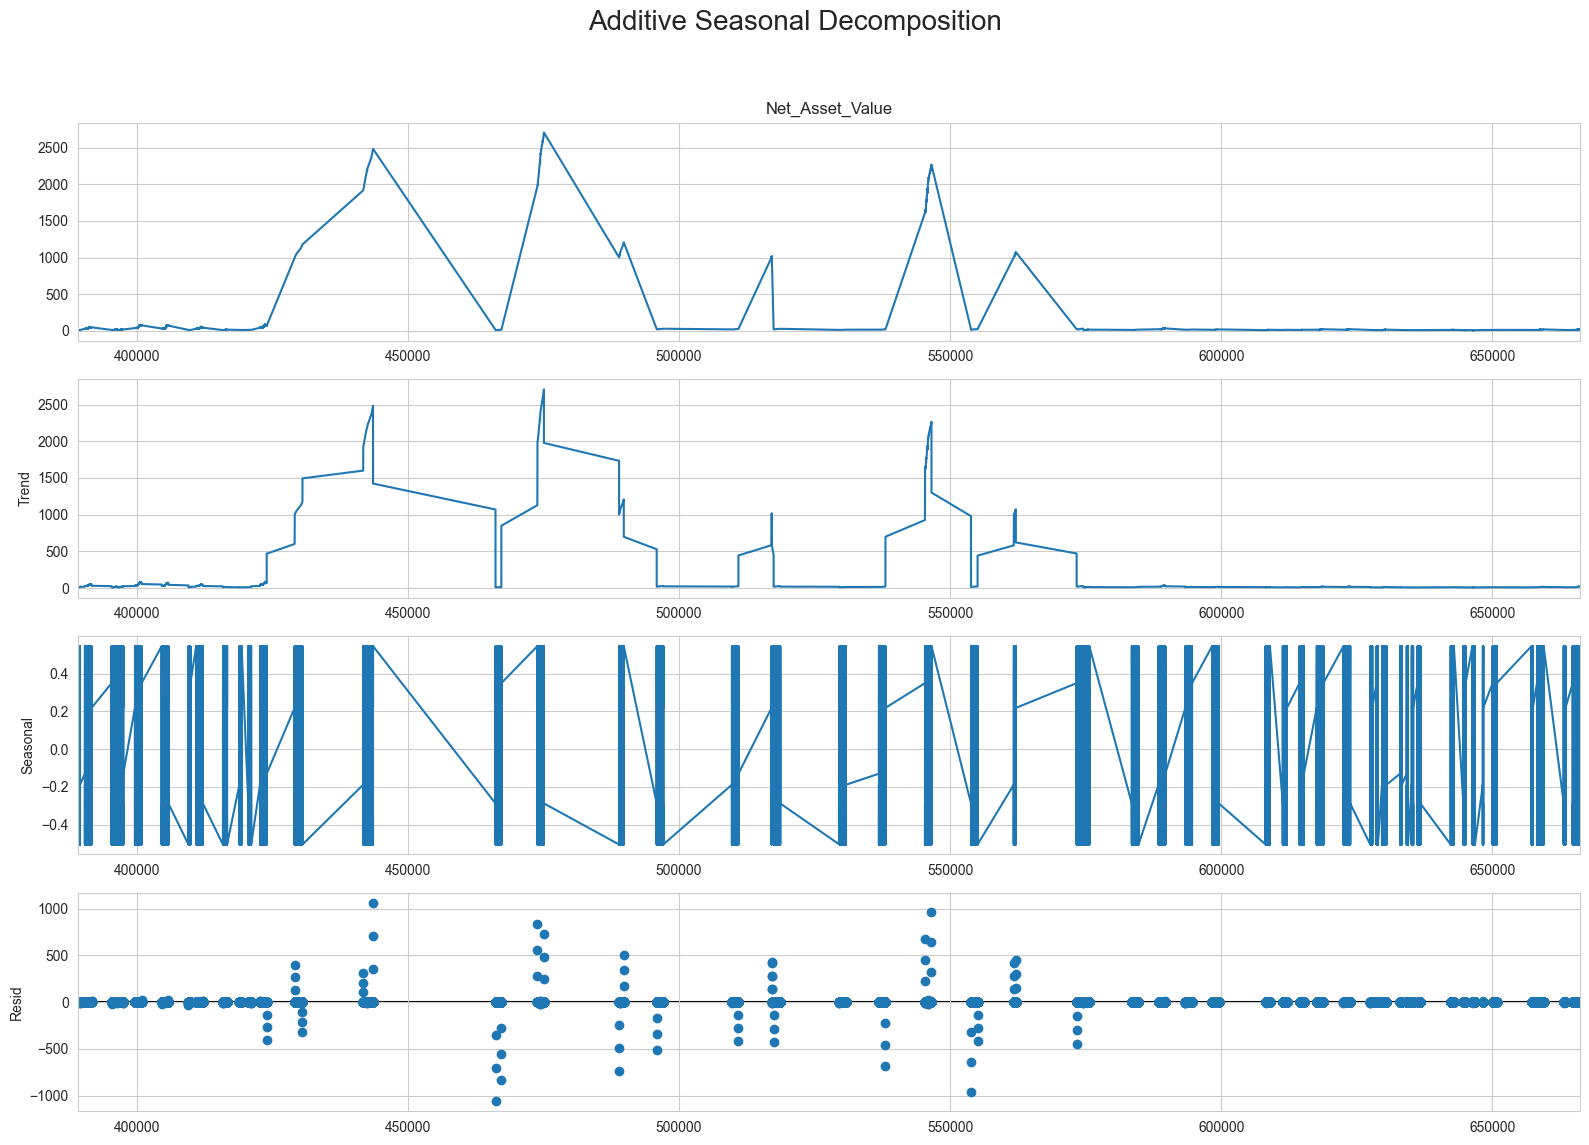

In [157]:
additive_seasonal_decompose = seasonal_decompose(Axis_mf['Net_Asset_Value'], model='additive', period=7)

plt.rcParams.update({'figure.figsize': (16,12)})
additive_seasonal_decompose.plot().suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600')])

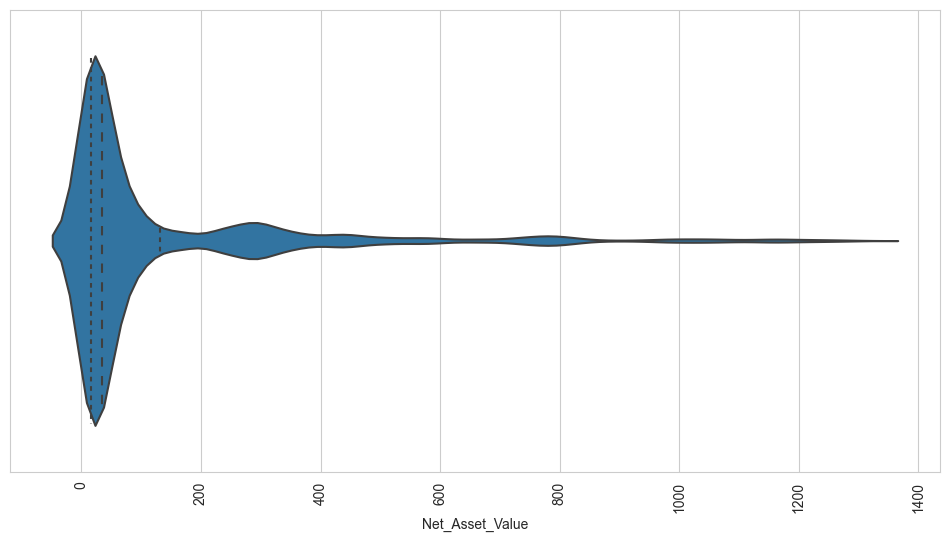

In [158]:
plt.figure(figsize=(12,6))
sns.violinplot(x= 'Net_Asset_Value', data=aditya_mf, split=True, inner='quart')
plt.xticks(rotation=90)

In [205]:
aditya_mf.groupby(['Scheme_Code','Scheme_Name']).agg(
    {
        'Net_Asset_Value' : ['mean', 'min', 'max', 'median','std']
    }
)

Net_Asset_Value  \
                                                                          mean   
Scheme_Code Scheme_Name                                                          
119436      Aditya Birla Sun Life Equity Advantage Fund - G...      524.443112   
119498      Aditya Birla Sun Life Short Term Fund - Growth ...       36.262715   
119501      Aditya Birla Sun Life Savings Fund - Growth - D...      408.558687   
119505      Aditya Birla Sun Life Dynamic Bond Fund - Growt...       35.094673   
119507      Aditya Birla Sun Life Dividend Yield Fund - Gro...      206.363258   
119511      Aditya Birla Sun Life Money Manager Fund - Grow...      274.876449   
119514      Aditya Birla Sun Life Infrastructure Fund - Gro...       39.395446   
119517      Aditya Birla Sun Life International Equity Fund...       26.257166   
119518      Aditya Birla Sun Life International Equity Fund...       22.229722   
119523      Aditya Birla Sun Life Low duration Fund - Growt...      525.664240   
119526      Aditya Birla Sun Life Arbitrage Fund - Growth -...       21.157341   
119528      Aditya Birla Sun Life Frontline Equity Fund - G...      282.601378   
119533      Aditya Birla Sun Life Corporate Bond Fund - Gro...       81.662704   
119536      Aditya Birla Sun Life India Reforms Fund - Grow...       20.721731   
119539      Aditya Birla Sun Life Medium Term Plan - Growth...       25.674922   
119544      Aditya Birla Sun Life Tax Relief '96 - Growth -...       37.488841   
119546      Aditya Birla Sun Life Special Situations Fund -...       26.403194   
119550      Aditya Birla Sun Life Banking & PSU Debt Fund- ...      273.681851   
119556      Aditya Birla Sun Life Small Cap Fund - Growth -...       43.360878   
119564      Aditya Birla Sun Life Focused Equity Fund - Gro...       76.241606   
119568      Aditya Birla Sun Life Liquid Fund - Growth - Di...      321.724970   
119576      Aditya Birla Sun Life Commodity Equities Fund -...       28.801904   
119591      Aditya Birla Sun Life India Gennext Fund - Grow...      112.555016   
119605      Aditya Birla Sun Life Government Securities Fun...       62.045063   
119614      Aditya Birla Sun Life Constant Maturity 10 Year...       49.351455   
119618      Aditya Birla Sun Life India Opportunities Fund ...      167.962903   
119620      Aditya Birla Sun Life Midcap Fund - Growth - Di...      366.555535   
119646      Aditya Birla Sun Life MNC Fund - Growth - Direc...      891.448136   
119648      Aditya Birla Sun Life Nifty 50 Index Fund - Gro...      135.044329   
119657      Aditya Birla Sun Life Income Fund - Growth - Di...       97.057634   
119659      Aditya Birla Sun Life Pure Value Fund - Growth ...       61.981150   
119661      Aditya Birla Sun Life Tax Plan - Direct Plan - ...       46.076750   
120517      Aditya Birla Sun Life Equity Hybrid'95 Fund - D...      924.170494   
120533      Aditya Birla Sun Life Banking & PSU Debt Fund -...       52.438657   
120539      Aditya Birla Sun Life Digital India Fund - Grow...       88.883428   
120546      Aditya Birla Sun Life Gold Fund - Growth - Dire...       13.773569   
120564      Aditya Birla Sun Life Flexi Cap Fund - Growth -...      935.216451   
120572      Aditya Birla Sun Life Monthly Income - Growth -...       69.475148   
120704      Aditya Birla Sun Life MIP - Direct Plan - Growth         46.972110   
120705      Aditya Birla Sun Life Regular Savings Fund - Gr...       46.844450   
120706      Aditya Birla Sun Life MIP II - Savings 5 Plan -...       34.457260   
122646      Aditya Birla Sun Life Floating Rate Fund-Direct...      258.342269   
125597      Aditya Birla Sun Life Banking and Financial Ser...       33.604976   
131670      Aditya Birla Sun Life Balanced Advantage Fund -...       65.551686   
131739      Aditya Birla Sun Life Tax Savings Fund - Direct...       73.895000   
131865      Aditya Birla Sun Life Asset Allocator FoF- Dire...       17.560270   
131898      Aditya Birla Sun Life Active Debt

In [162]:
aditya_mf.columns

Index(['Scheme_Name', 'Net_Asset_Value', 'Date'], dtype='object')

In [163]:
aditya_mf1 = aditya_mf.drop(['Scheme_Name'], axis=1)

In [164]:
aditya_mf1.head()

Net_Asset_Value         Date
0          46.4526  05-Mar-2018
1          46.4542  06-Mar-2018
2          46.6507  07-Mar-2018
3          46.7080  08-Mar-2018
4          46.6931  09-Mar-2018

In [166]:
df_time = aditya_mf1[['Date', 'Net_Asset_Value']]
print(df_time.size)
df_time.columns = ['ds', 'y']

142188


In [178]:
df_time.drop_duplicates(keep='first',inplace=True)

WARNING - (py.warnings._showwarnmsg) - /var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_39239/2897159290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time.drop_duplicates(keep='first',inplace=True)



In [182]:
df_time.head(100)

ds        y
0    05-Mar-2018  46.4526
1    06-Mar-2018  46.4542
2    07-Mar-2018  46.6507
3    08-Mar-2018  46.7080
4    09-Mar-2018  46.6931
5    12-Mar-2018  46.8003
6    13-Mar-2018  46.7729
7    14-Mar-2018  46.7263
8    15-Mar-2018  46.8242
9    16-Mar-2018  46.9807
10   19-Mar-2018  46.9086
11   20-Mar-2018  46.9043
12   21-Mar-2018  46.9568
13   22-Mar-2018  47.0086
14   23-Mar-2018  47.0278
15   26-Mar-2018  46.9402
16   27-Mar-2018  47.5233
17   28-Mar-2018  47.4136
18   03-Apr-2018  47.5819
19   04-Apr-2018  47.6684
20   05-Apr-2018  48.0286
21   06-Apr-2018  47.9153
22   09-Apr-2018  47.8192
23   10-Apr-2018  47.4888
24   11-Apr-2018  47.1827
25   12-Apr-2018  47.3121
26   13-Apr-2018  47.4056
27   16-Apr-2018  47.3100
28   17-Apr-2018  47.3150
29   18-Apr-2018  47.2126
30   19-Apr-2018  47.0013
31   20-Apr-2018  46.8432
32   23-Apr-2018  46.8065
33   24-Apr-2018  46.8960
34   25-Apr-2018  46.7979
35   26-Apr-2018  46.7431
36   27-Apr-2018  46.7230
37   02-May-2018  46.8246
38   03-May-2018  46.8292
39   04-May-2018  46.8422
40   07-May-2018  47.0398
41   08-May-2018  47.1552
42   09-May-2018  46.9169
43   10-May-2018  46.8944
44   11-May-2018  46.8673
45   14-May-2018  46.7410
46   15-May-2018  46.6405
47   16-May-2018  46.6330
48   17-May-2018  46.6625
49   18-May-2018  46.7481
50   21-May-2018  46.7255
51   22-May-2018  46.7348
52   23-May-2018  46.6703
53   24-May-2018  46.6411
54   25-May-2018  46.7687
55   28-May-2018  46.8799
56   29-May-2018  46.9336
57   30-May-2018  46.8532
58   31-May-2018  46.7772
59   01-Jun-2018  46.7502
300  05-Mar-2018  34.1687
301  06-Mar-2018  34.1860
302  07-Mar-2018  34.2284
303  08-Mar-2018  34.2536
304  09-Mar-2018  34.2552
305  12-Mar-2018  34.3045
306  13-Mar-2018  34.3318
307  14-Mar-2018  34.3233
308  15-Mar-2018  34.3342
309  16-Mar-2018  34.3548
310  19-Mar-2018  34.3448
311  20-Mar-2018  34.3634
312  21-Mar-2018  34.3981
313  22-Mar-2018  34.4040
314  23-Mar-2018  34.4144
315  26-Mar-2018  34.4221
316  27-Mar-2018  34.4900
317  28-Mar-2018  34.5188
318  03-Apr-2018  34.5959
319  04-Apr-2018  34.6067
320  05-Apr-2018  34.6563
321  06-Apr-2018  34.6491
322  09-Apr-2018  34.6814
323  10-Apr-2018  34.6599
324  11-Apr-2018  34.6312
325  12-Apr-2018  34.6248
326  13-Apr-2018  34.6248
327  16-Apr-2018  34.6494
328  17-Apr-2018  34.6445
329  18-Apr-2018  34.6294
330  19-Apr-2018  34.5784
331  20-Apr-2018  34.5263
332  23-Apr-2018  34.5179
333  24-Apr-2018  34.5066
334  25-Apr-2018  34.4719
335  26-Apr-2018  34.4294
336  27-Apr-2018  34.4210
337  02-May-2018  34.4837
338  03-May-2018  34.4922
339  04-May-2018  34.4959

In [180]:
df_time.shape

(71069, 2)

In [181]:
from neuralprophet import NeuralProphet 
n = NeuralProphet()
model = n.fit(df_time, freq='D', epochs=5000)

ValueError: Column ds has duplicate values. Please remove duplicates.

In [153]:
hdfc_mf.shape

(48594, 3)

In [154]:
Parag_mf.shape

(4019, 3)

In [100]:
Net_Asset_Value = aditya_mf['Net_Asset_Value']

diff_value = []
try:
    diff_value.append(0)
    for i in range (1, len(Net_Asset_Value)):
        deff = Net_Asset_Value[i]- Net_Asset_Value[i-1]
        diff_value.append(round(deff, 4))

except Exception as e:
    print(diff_value)


[0, 0.0016, 0.1965, 0.0573, -0.0149, 0.1072, -0.0274, -0.0466, 0.0979, 0.1565, -0.0721, -0.0043, 0.0525, 0.0518, 0.0192, -0.0876, 0.5831, -0.1097, 0.1683, 0.0865, 0.3602, -0.1133, -0.0961, -0.3304, -0.3061, 0.1294, 0.0935, -0.0956, 0.005, -0.1024, -0.2113, -0.1581, -0.0367, 0.0895, -0.0981, -0.0548, -0.0201, 0.1016, 0.0046, 0.013, 0.1976, 0.1154, -0.2383, -0.0225, -0.0271, -0.1263, -0.1005, -0.0075, 0.0295, 0.0856, -0.0226, 0.0093, -0.0645, -0.0292, 0.1276, 0.1112, 0.0537, -0.0804, -0.076, -0.027]


In [101]:
mff = pd.DataFrame(diff_value)

In [102]:
mff.shape

(60, 1)

In [107]:
mf_dd = pd.concat([mf_2,mff.iloc[:,0]],axis=1)

In [110]:
pd.set_option('display.max_row', None)
mf_dd.head()

Scheme_Name  Net_Asset_Value  \
0  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.4526   
1  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.4542   
2  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.6507   
3  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.7080   
4  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.6931   

          Date       0  
0  05-Mar-2018  0.0000  
1  06-Mar-2018  0.0016  
2  07-Mar-2018  0.1965  
3  08-Mar-2018  0.0573  
4  09-Mar-2018 -0.0149

In [111]:
mf_dd.shape

(1108810, 4)

In [28]:
mf_2.head()

Scheme_Name  Net_Asset_Value  \
0  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.4526   
1  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.4542   
2  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.6507   
3  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.7080   
4  Aditya Birla Sun Life MIP - Direct Plan - Growth          46.6931   

          Date    C  
0  05-Mar-2018  0.0  
1  06-Mar-2018  0.0  
2  07-Mar-2018  0.0  
3  08-Mar-2018  0.0  
4  09-Mar-2018  0.0

In [240]:
mf.isnull().sum()

Scheme_Name        1818
Net_Asset_Value    1818
Date               1818
Scheme_name1       1818
dtype: int64

In [130]:
mf_db.describe()

Scheme_Code                                 Scheme_Name  \
count      7210502                                     7208684   
unique        8258                                        8124   
top         119832  LIC MF Liquid Fund-Regular Plan-Daily IDCW   
freq          1825                                        1825   

       ISIN_Div_Payout_ISIN_Growth ISIN_Div_Reinvestment Net_Asset_Value  \
count                      7208684               7208684         7208684   
unique                        6988                  3995         1966762   
top                                                               0.0000   
freq                        798261               3340761           71994   

       Repurchase_Price Sale_Price         Date  
count           7208684    7208684      7208684  
unique           239627     236166         1825  
top                                 02-Mar-2023  
freq            6802836    6802836         6373

In [131]:
mf_db.shape

(7210502, 8)

In [132]:
mf_db.isnull().sum()

Scheme_Code                       0
Scheme_Name                    1818
ISIN_Div_Payout_ISIN_Growth    1818
ISIN_Div_Reinvestment          1818
Net_Asset_Value                1818
Repurchase_Price               1818
Sale_Price                     1818
Date                           1818
dtype: int64

In [133]:
new_df = mf_db.copy()

In [134]:
new_df.dropna(axis=0 , inplace=True)

In [135]:
new_df.shape

(7208684, 8)

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208684 entries, 0 to 7210501
Data columns (total 8 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   Scheme_Code                  object
 1   Scheme_Name                  object
 2   ISIN_Div_Payout_ISIN_Growth  object
 3   ISIN_Div_Reinvestment        object
 4   Net_Asset_Value              object
 5   Repurchase_Price             object
 6   Sale_Price                   object
 7   Date                         object
dtypes: object(8)
memory usage: 495.0+ MB


In [137]:
new_df.isnull().sum()

Scheme_Code                    0
Scheme_Name                    0
ISIN_Div_Payout_ISIN_Growth    0
ISIN_Div_Reinvestment          0
Net_Asset_Value                0
Repurchase_Price               0
Sale_Price                     0
Date                           0
dtype: int64

In [138]:
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

In [139]:
new_df['Sale_Price'] = pd.to_numeric(new_df['Sale_Price'], errors='coerce').fillna(0, downcast='infer')

In [140]:
new_df['Net_Asset_Value'] = pd.to_numeric(new_df['Net_Asset_Value'], errors='coerce').fillna(0, downcast='infer')

In [141]:
new_df['Repurchase_Price'] = pd.to_numeric(new_df['Repurchase_Price'], errors='coerce').fillna(0, downcast='infer')

In [142]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208684 entries, 0 to 7210501
Data columns (total 8 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Scheme_Code                  object 
 1   Scheme_Name                  object 
 2   ISIN_Div_Payout_ISIN_Growth  object 
 3   ISIN_Div_Reinvestment        object 
 4   Net_Asset_Value              float64
 5   Repurchase_Price             float64
 6   Sale_Price                   float64
 7   Date                         object 
dtypes: float64(3), object(5)
memory usage: 495.0+ MB


In [143]:
# D_Data = new_df.iloc[0:400000,:]

In [144]:
# D_Data.shape

In [145]:
# D_Data.to_csv("D_Data.csv")

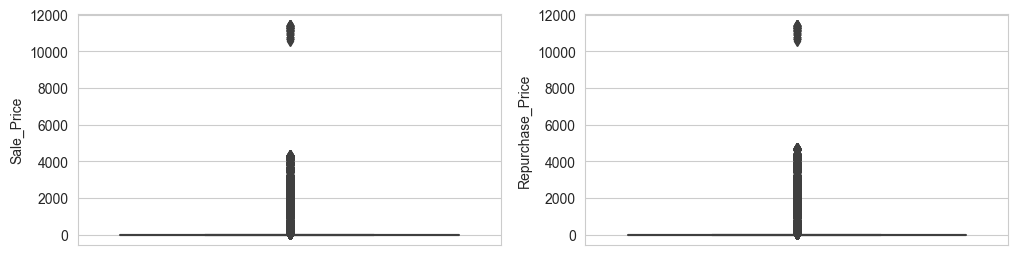

In [146]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.boxplot(y = 'Sale_Price', data = new_df)

# plt.subplot(1,2,2)
# sns.boxplot(y = 'Net_Asset_Value ', data = new_df)

plt.subplot(1,2,2)
sns.boxplot(y = 'Repurchase_Price', data = new_df)
plt.show()

/var/folders/0y/mwh4sz4x7n98q__h0k1h0mkc0000gn/T/ipykernel_28033/3118894673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Sale_Price'])


<AxesSubplot: xlabel='Sale_Price', ylabel='Density'>

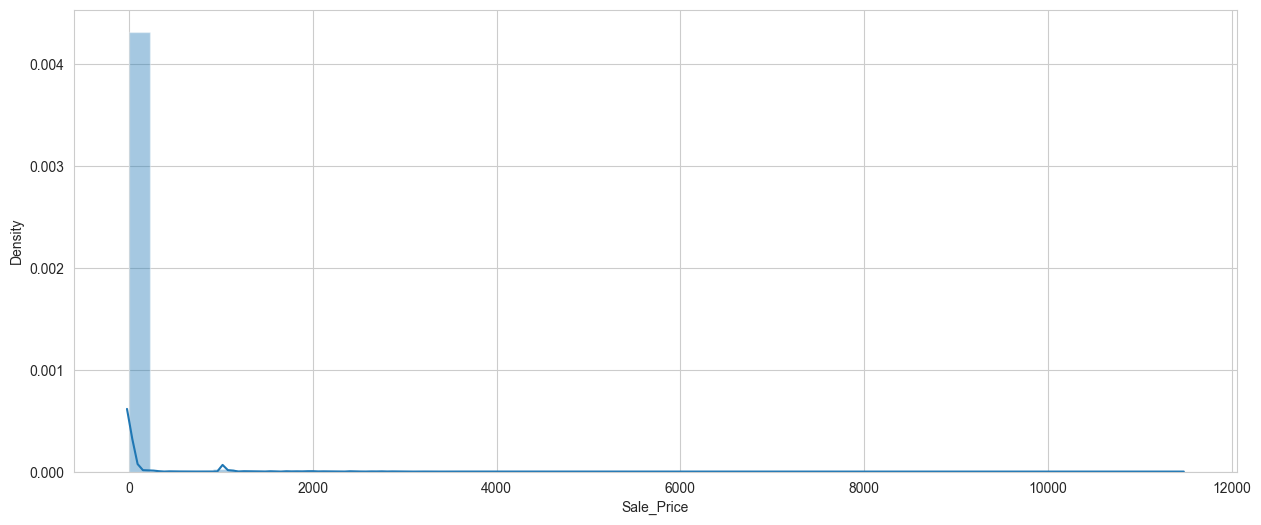

In [147]:
plt.figure(figsize=(15,6))
sns.distplot(new_df['Sale_Price'])

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000')])

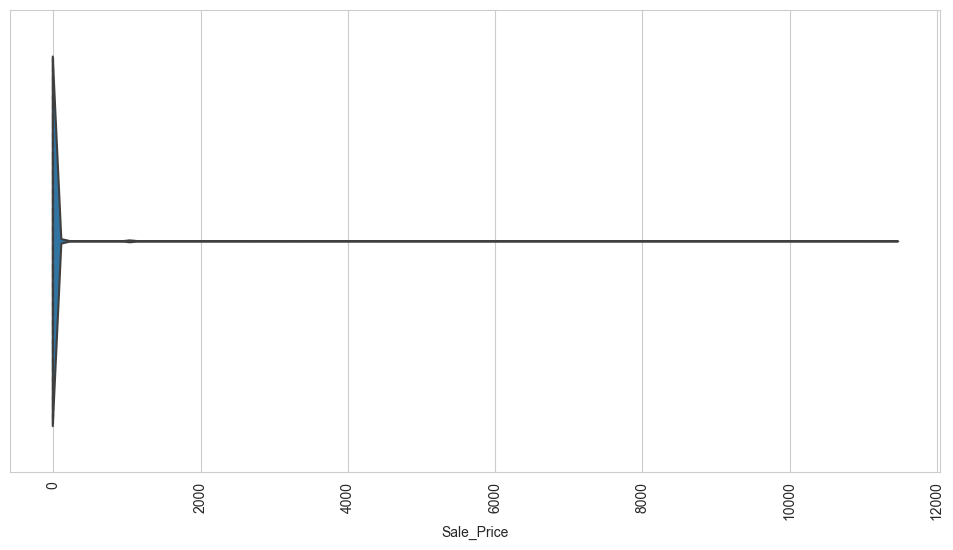

In [148]:
plt.figure(figsize=(12,6))
sns.violinplot(x= 'Sale_Price', data=new_df, split=True, inner='quart')
plt.xticks(rotation=90)

In [149]:
maxsale = max(new_df['Sale_Price'])
print(maxsale)

11455.8062


In [150]:
minsale = min(new_df['Sale_Price'])
print(minsale)

0.0


In [151]:
new_df.columns

Index(['Scheme_Code', 'Scheme_Name', 'ISIN_Div_Payout_ISIN_Growth',
       'ISIN_Div_Reinvestment', 'Net_Asset_Value', 'Repurchase_Price',
       'Sale_Price', 'Date'],
      dtype='object')

In [ ]:
new_df.groupby('Scheme_Name').agg(
    {
        'Scheme_Code' : ['count'],
        'Net_Asset_Value' : ['mean', 'min', 'max', 'median'],
        'Repurchase_Price' : ['mean', 'min', 'max', 'median'],
        'Sale_Price' : ['mean','min','max','median']
    }
)

In [153]:
new_df['ISIN_Div_Payout_ISIN_Growth'].value_counts()

                798261
-                 2116
INF789FA1J82      1825
INF789F01BB4      1825
INF789F01BC2      1825
INF789F01PH1      1825
INF789F01XQ6      1825
INF789FA1J33      1825
INF789F01PI9      1825
INF789FA1J09      1825
INF194KA12C4      1825
INF205K01UX5      1825
INF789FA1K22      1825
INF789F01XR4      1825
INF789FA1K06      1825
INF789FA1K63      1825
INF666M01089      1825
INF666M01071      1825
INF666M01063      1825
INF789FA1J66      1825
INF205K01MG7      1825
INF205K01MF9      1825
INF205K01HM5      1825
INF109K01Q49      1825
INF209K01RU9      1825
INF209K01VA3      1825
INF209K01KQ2      1825
INF209K01UZ2      1825
INF209K01VD7      1825
INF209K01VC9      1825
INF209KA1LK7      1825
INF209KA1LI1      1825
INF209K01KU4      1825
INF209K01KZ3      1825
INF209K01RT1      1825
INF209K01ME4      1825
INF205K01HG7      1825
INF205K01HQ6      1825
INF200K01UR8      1825
INF200K01UU2      1825
INF200K01UT4      1825
INF740K01FM5      1825
INF761K01785      1825
INF194K01I6

In [154]:
new_df.head()

Scheme_Code                                       Scheme_Name  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth   

  ISIN_Div_Payout_ISIN_Growth ISIN_Div_Reinvestment  Net_Asset_Value  \
0                INF209K01XB7                                46.4526   
1                INF209K01XB7                                46.4542   
2                INF209K01XB7                                46.6507   
3                INF209K01XB7                                46.7080   
4                INF209K01XB7                                46.6931   

   Repurchase_Price  Sale_Price         Date  
0           45.9881     46.4526  05-Mar-2018  
1           45.9897     46.4542  06-Mar-2018  
2           46.1842     46.6507  07-Mar-2018  
3           46.2409     46.7080  08-Mar-2018  
4           46.2262     46.6931  09-Mar-2018

In [155]:
x = new_df.drop(columns=['Scheme_Code','Scheme_Name','ISIN_Div_Payout_ISIN_Growth','ISIN_Div_Reinvestment','Date'])
y = new_df[['Scheme_Code','Scheme_Name','Date']]

In [156]:
x.head()

Net_Asset_Value  Repurchase_Price  Sale_Price
0          46.4526           45.9881     46.4526
1          46.4542           45.9897     46.4542
2          46.6507           46.1842     46.6507
3          46.7080           46.2409     46.7080
4          46.6931           46.2262     46.6931

In [157]:
y.head()

Scheme_Code                                       Scheme_Name         Date
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  05-Mar-2018
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  06-Mar-2018
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  07-Mar-2018
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  08-Mar-2018
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  09-Mar-2018

In [158]:
data = x
z = (data-data.mean())/data.std()

In [159]:
z.head()

Net_Asset_Value  Repurchase_Price  Sale_Price
0        -0.405870          0.177832    0.189909
1        -0.405867          0.177841    0.189919
2        -0.405568          0.179022    0.191144
3        -0.405480          0.179366    0.191501
4        -0.405503          0.179277    0.191408

In [160]:
data_d = pd.concat([y,z.iloc[:,0:3]],axis=1)

In [161]:
data_d.head()

Scheme_Code                                       Scheme_Name         Date  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  05-Mar-2018   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  06-Mar-2018   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  07-Mar-2018   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  08-Mar-2018   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  09-Mar-2018   

   Net_Asset_Value  Repurchase_Price  Sale_Price  
0        -0.405870          0.177832    0.189909  
1        -0.405867          0.177841    0.189919  
2        -0.405568          0.179022    0.191144  
3        -0.405480          0.179366    0.191501  
4        -0.405503          0.179277    0.191408

In [162]:
data_d1=data_d.copy()

In [163]:
data_d2 = pd.melt(data_d, id_vars=['Scheme_Code','Scheme_Name','Date'])
data_d2.head()

Scheme_Code                                       Scheme_Name         Date  \
0      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  05-Mar-2018   
1      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  06-Mar-2018   
2      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  07-Mar-2018   
3      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  08-Mar-2018   
4      120704  Aditya Birla Sun Life MIP - Direct Plan - Growth  09-Mar-2018   

          variable     value  
0  Net_Asset_Value -0.405870  
1  Net_Asset_Value -0.405867  
2  Net_Asset_Value -0.405568  
3  Net_Asset_Value -0.405480  
4  Net_Asset_Value -0.405503

<Figure size 1500x1000 with 0 Axes>

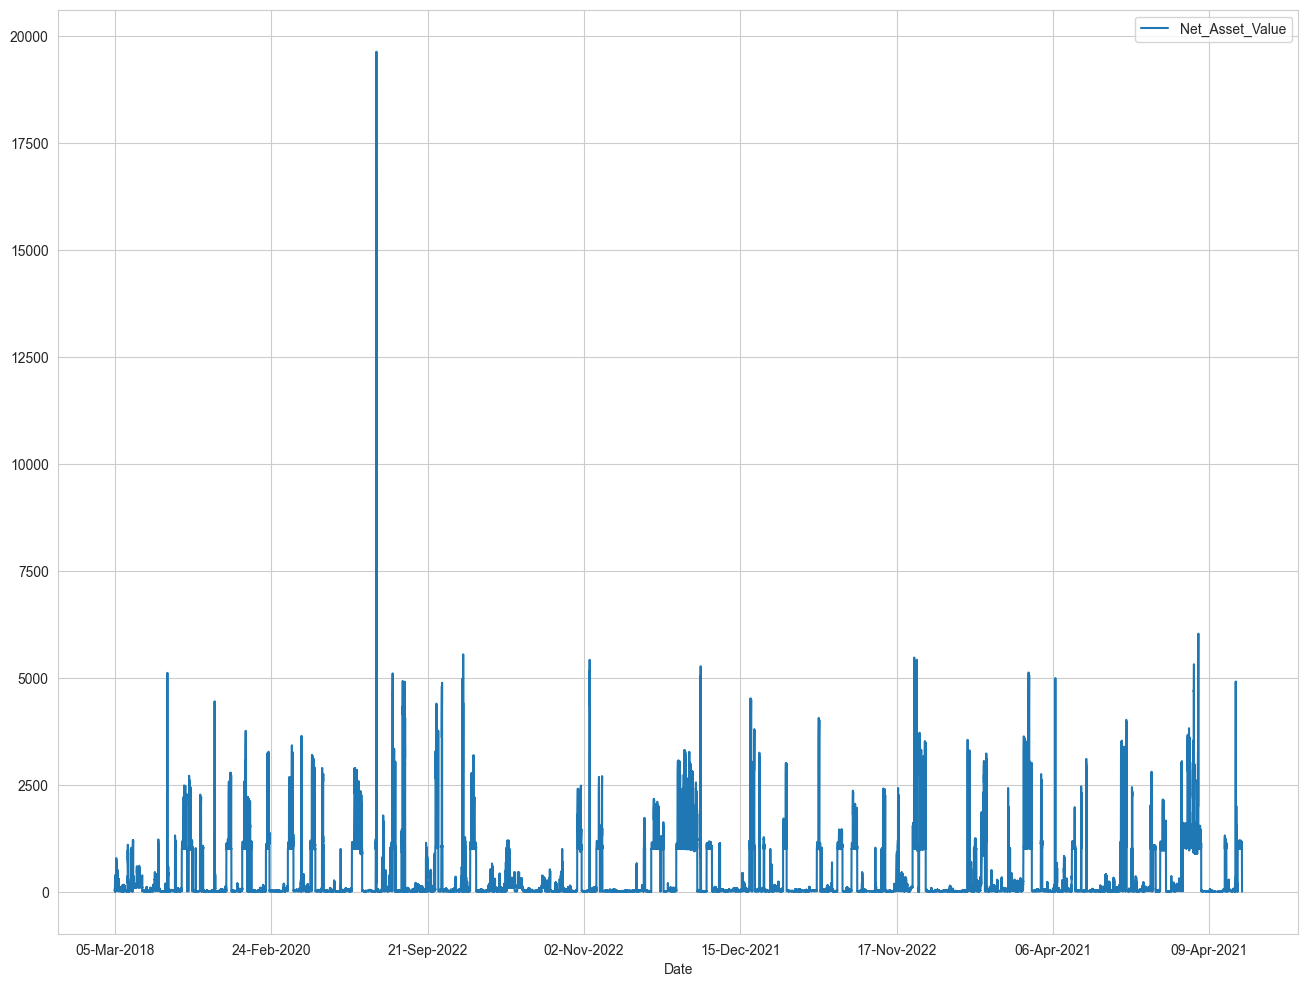

In [164]:
plt.figure(figsize=(15,10))
new_df.plot(x='Date',y=['Scheme_Name','Net_Asset_Value'], kind='line')
plt.show()

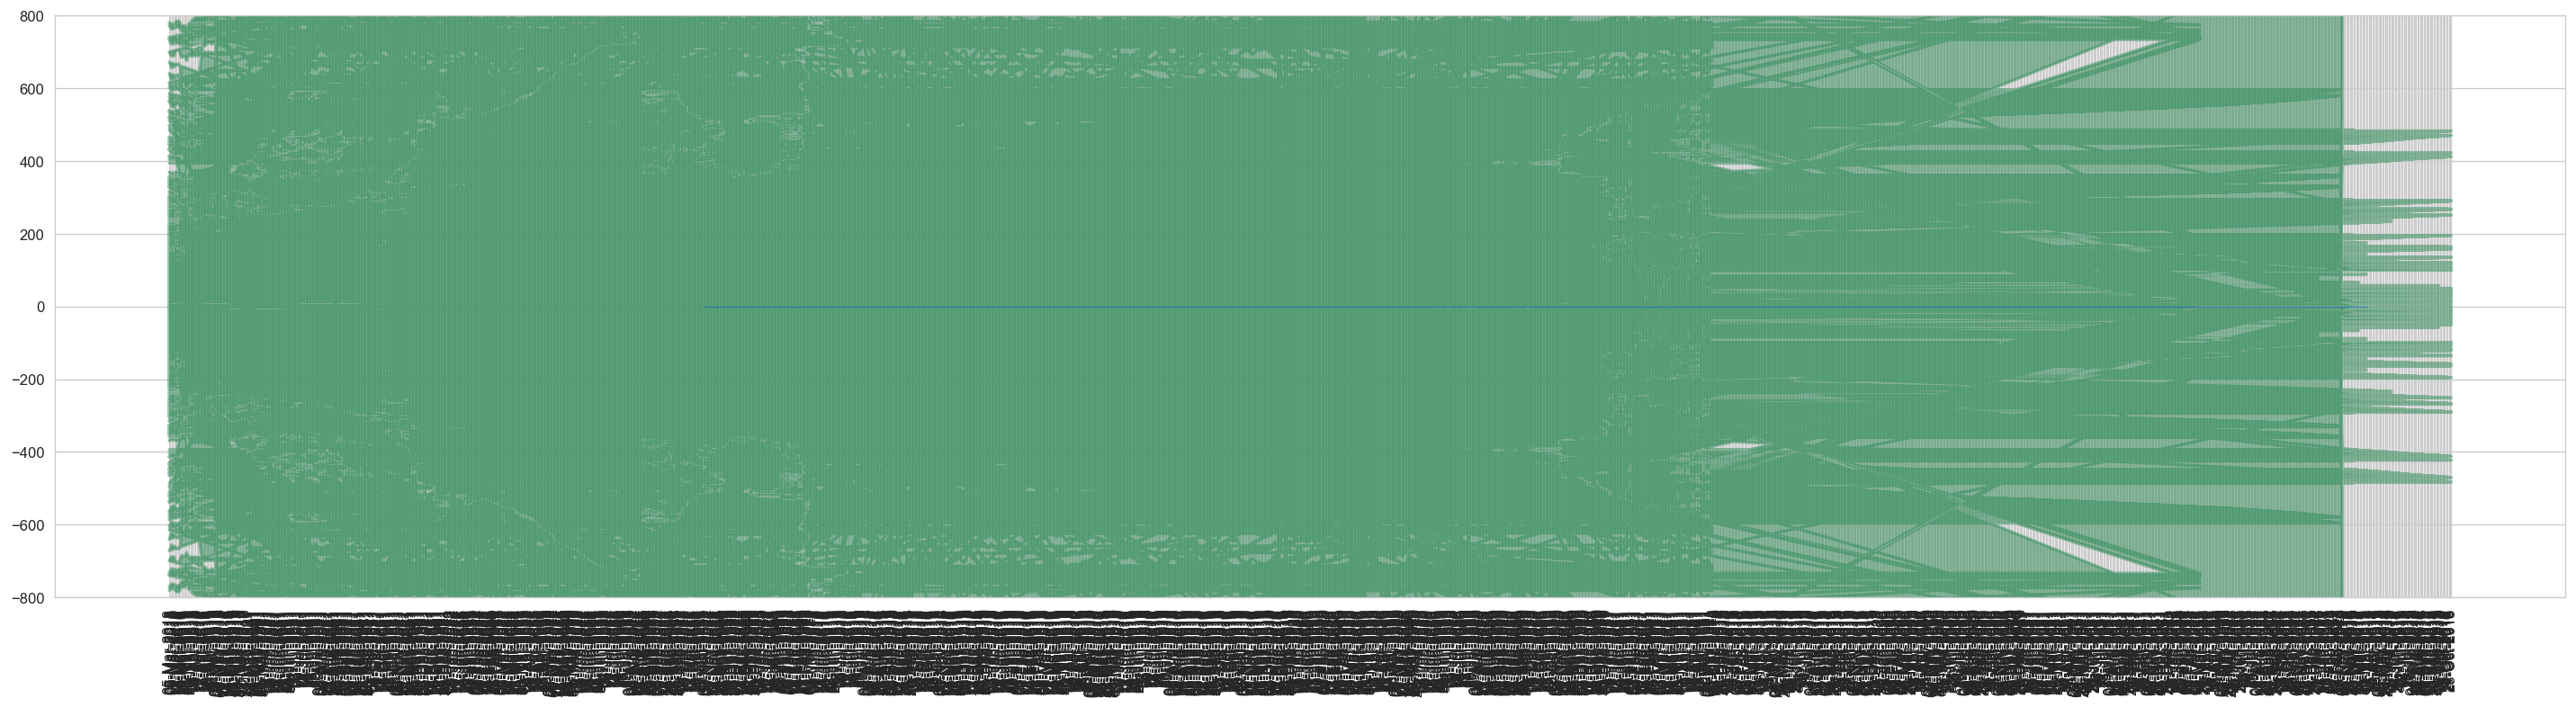

In [165]:
import numpy as np
xx = new_df['Date'].values
yy = new_df['Net_Asset_Value'].values

fig, ax = plt.subplots(1,1,figsize=(30,7), dpi=120)
plt.fill_between(xx, y1=yy, y2= -yy, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800,800)
plt.hlines(y=0, xmin=np.min(new_df['Date']), xmax=np.max(new_df['Date']),linewidth=0.5)
plt.xticks(rotation=90)
plt.show()

In [166]:
pd.set_option('display.max_row', None)
new_df.Scheme_Name.value_counts()

LIC MF Liquid Fund-Regular Plan-Daily IDCW                                                                                                                           1825
Aditya Birla Sun Life Liquid Fund -Daily IDCW                                                                                                                        1825
DSP Liquidity Fund - Direct Plan - IDCW - Daily                                                                                                                      1825
DSP Liquidity Fund - Direct Plan - IDCW - Weekly                                                                                                                     1825
DSP Liquidity Fund - Regular Plan - Growth                                                                                                                           1825
DSP Liquidity Fund - Regular Plan - IDCW - Weekly                                                                                                     

In [167]:
new_df.Scheme_Code.value_counts()

119569    1825
139582    1825
139387    1825
139583    1825
139389    1825
139584    1825
104489    1825
104488    1825
104492    1825
104486    1825
120534    1825
120535    1825
120536    1825
105280    1825
105282    1825
105283    1825
105281    1825
105279    1825
105275    1825
105274    1825
119800    1825
119799    1825
119805    1825
119804    1825
103140    1825
101206    1825
114297    1825
119832    1825
119833    1825
104485    1825
108691    1825
100843    1825
115489    1825
100837    1825
112340    1825
100855    1825
118701    1825
118700    1825
100047    1825
119568    1825
100046    1825
119123    1825
119571    1825
119570    1825
100041    1825
100048    1825
103885    1825
100044    1825
100051    1825
112014    1825
100043    1825
100042    1825
118698    1825
115400    1825
118696    1825
118695    1825
100852    1825
108692    1825
108690    1825
108693    1825
119831    1825
120537    1825
104484    1825
122786    1825
120794    1825
140913    1825
120558    

In [101]:
!pip3 install statsmodels

/Users/subirsaha/.zshenv:2: closing brace expected
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 989.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [168]:
import matplotlib.animation as animation
sns.set_style("whitegrid")
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [169]:
data_d1.columns

Index(['Scheme_Code', 'Scheme_Name', 'Date', 'Net_Asset_Value',
       'Repurchase_Price', 'Sale_Price'],
      dtype='object')

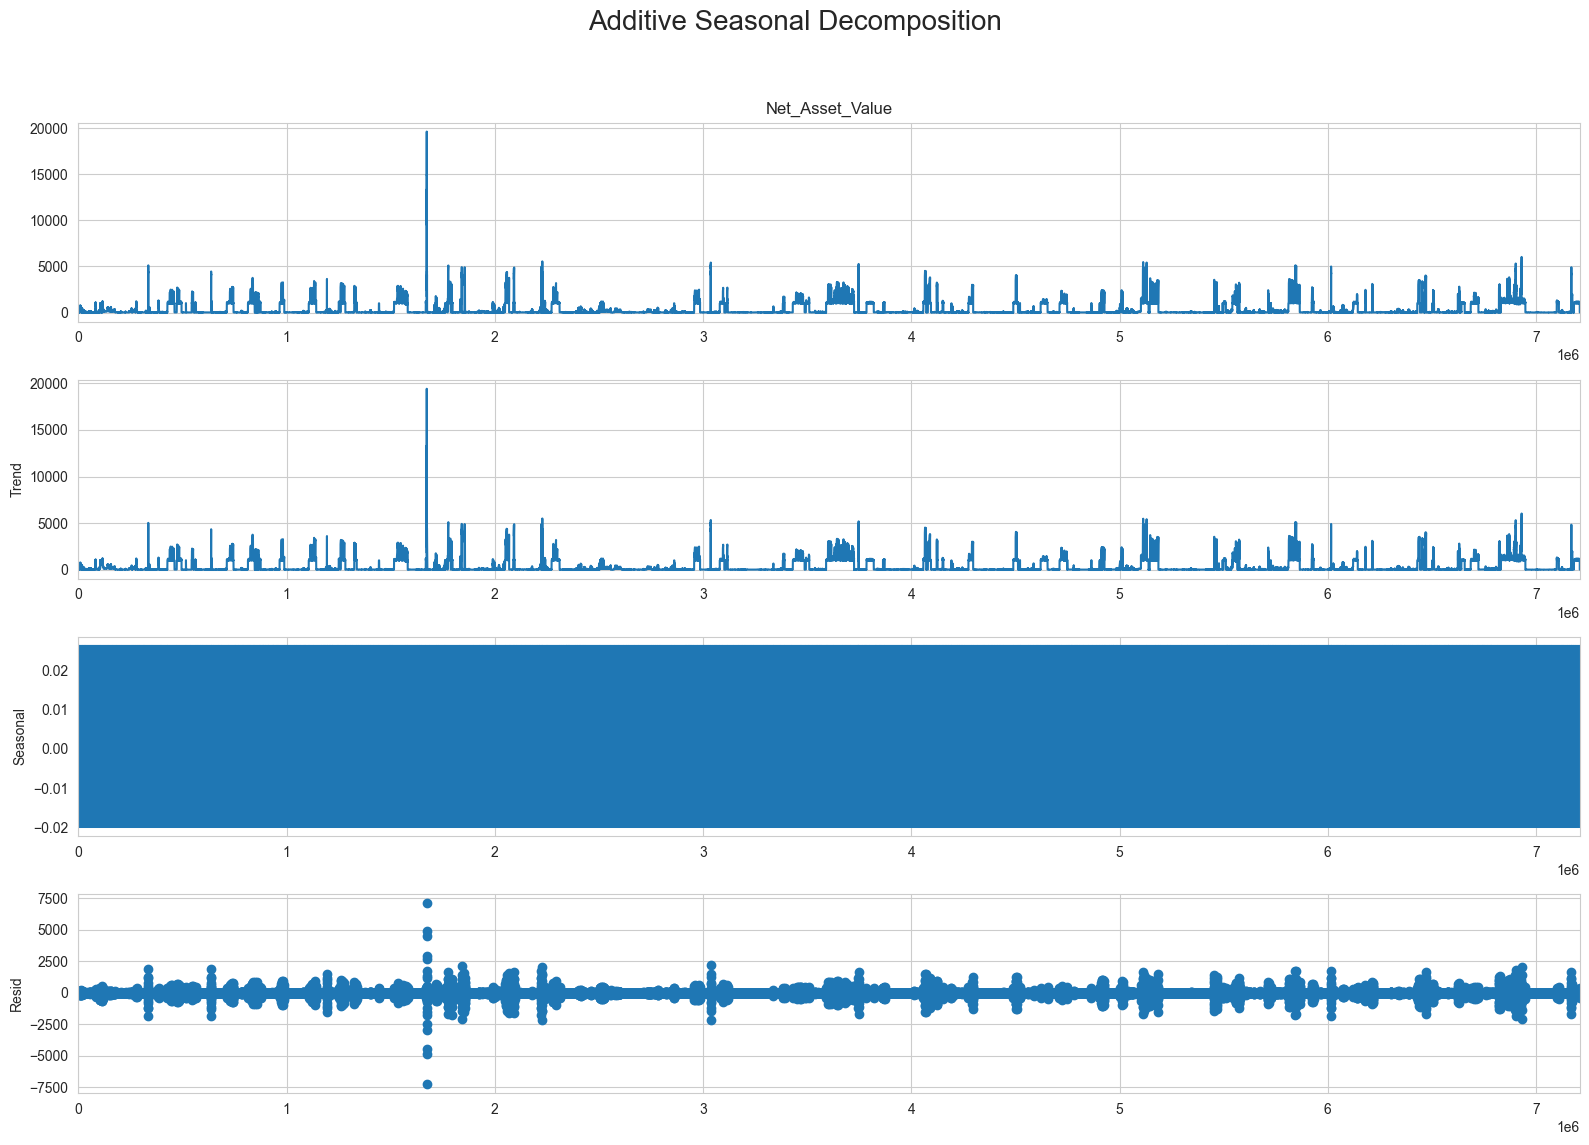

In [170]:
additive_seasonal_decompose = seasonal_decompose(new_df['Net_Asset_Value'], model='additive', period=7)

plt.rcParams.update({'figure.figsize': (16,12)})
additive_seasonal_decompose.plot().suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

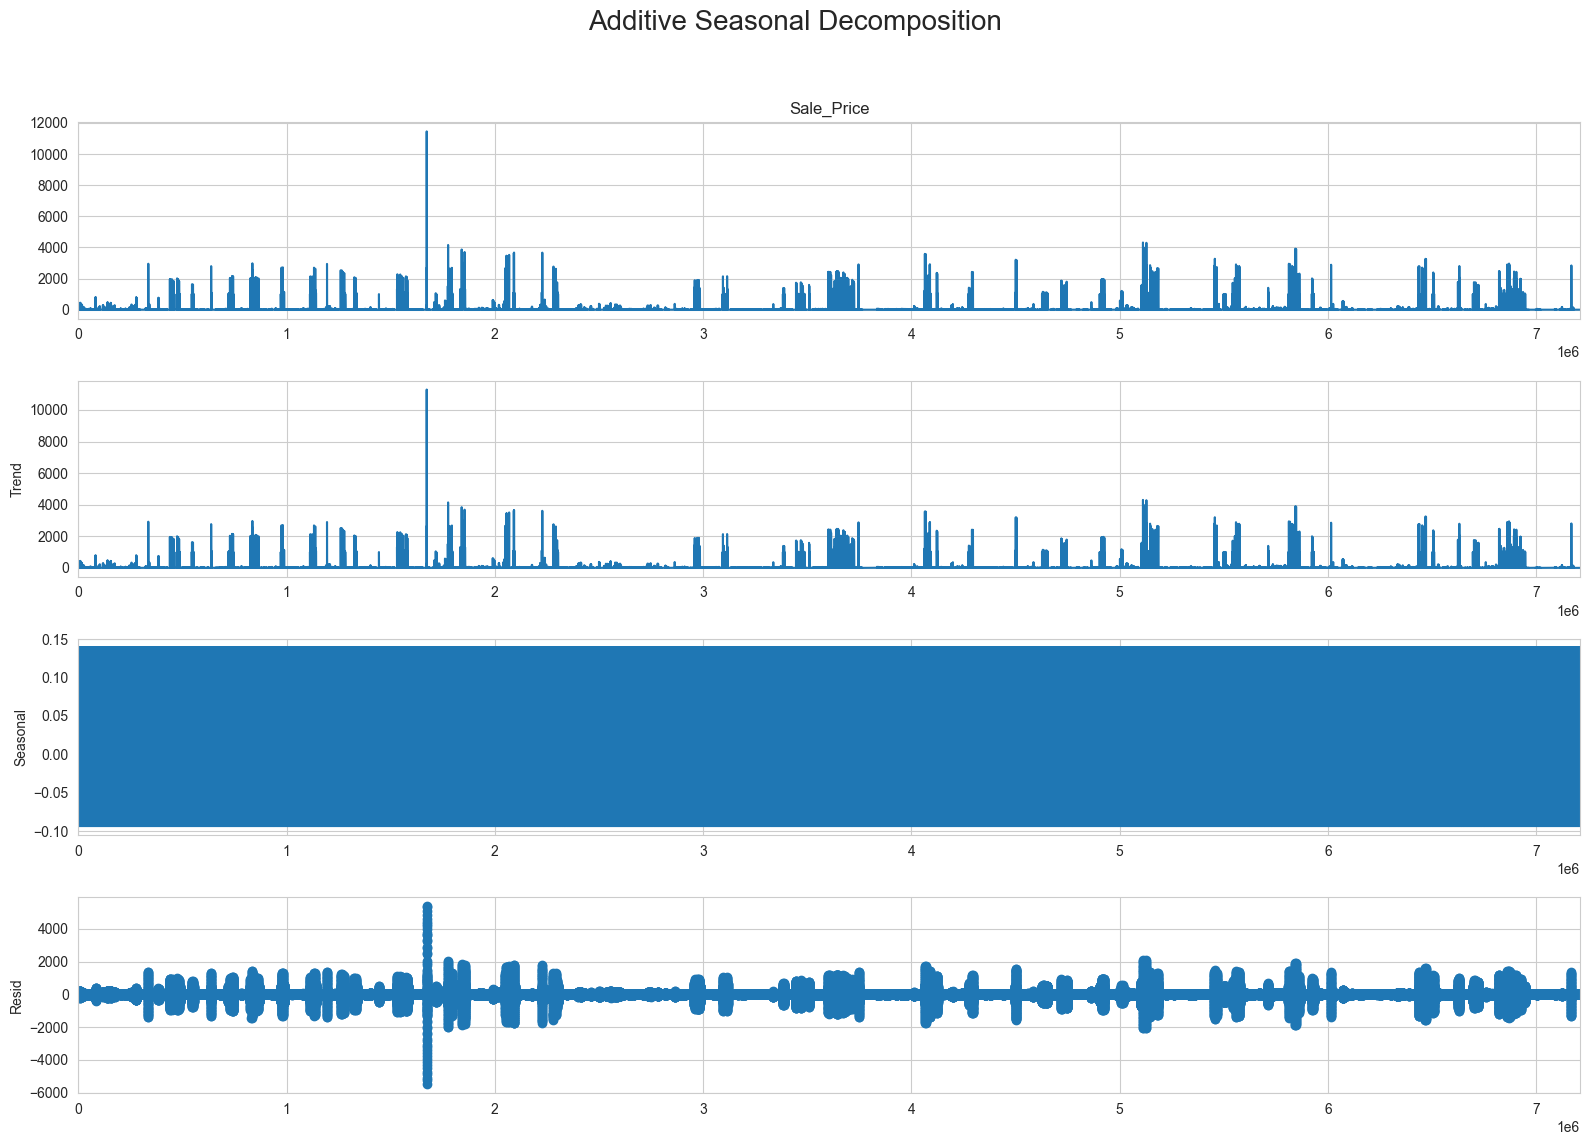

In [171]:
additive_seasonal_decompose = seasonal_decompose(new_df['Sale_Price'], model='additive', period=30)

plt.rcParams.update({'figure.figsize': (16,12)})
additive_seasonal_decompose.plot().suptitle("Additive Seasonal Decomposition", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [289]:
import pandas as pd
import  numpy as np

def solution(obs_A, obs_B):
    error_sum = 0.
    loo = lambda arr, idx: arr[:idx] + arr[(idx + 1):]
    n = len(obs_A)
    for i in range(n):
        A_train = loo(obs_A, i)
        B_train = loo(obs_B, i)
        mean_A = sum(A_train) / (n - 1.0)
        mean_B = sum(B_train) / (n - 1.0)
        
        slope = 

        intercept = mean_B - slope * mean_A
        pred_B = slope * obs_A[i] + intercept
        error_sum += (pred_B - obs_B[i])**2

    ans = error_sum / float(n)
    return ans